---
---
# Analysis of Electric Vehicle Range
---
---

***
## Authorship and Resources Used
* Ali Khatai
* Resources used: [Kaggle](https://www.kaggle.com/))

***
## Data Description and Source
* This dataset was taken from Kaggle and it contains data about various electric vehicles. It tells us about the brands and models of electric and technical specification about each model such as their top speed, acceleration, range, efficiency etc.
* The [dataset](https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset) is from Kaggle made by GEOFF839. The exact source of the data was unclear in the Kaggle post.

***
## Import Libraries and Set Preferences for Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# add any additional libraries or plot preferences to this block

***
## Read and Verify Data


In [ ]:
# enter and test your code here
# enter and test your code here

# install Kaggle
! pip install -q kaggle

from google.colab import files
files.upload()

# make kaggle directory and move the file
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# API command for the dataset
! kaggle datasets download -d geoffnel/evs-one-electric-vehicle-dataset

# unzip the data
! mkdir kaggledata
! unzip evs-one-electric-vehicle-dataset.zip -d kaggledata

Saving kaggle.json to kaggle.json
  0% 0.00/5.76k [00:00<?, ?B/s]
100% 5.76k/5.76k [00:00<00:00, 4.30MB/s]
Archive:  evs-one-electric-vehicle-dataset.zip
  inflating: kaggledata/ElectricCarData_Clean.csv  
  inflating: kaggledata/ElectricCarData_Norm.csv  


In [ ]:
# Create the dataFrame from the CSV file
df = pd.read_csv('/content/kaggledata/ElectricCarData_Clean.csv', encoding= 'unicode_escape')

In [ ]:
# Examine the data frames
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB
None


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [ ]:
# check for any duplicate or null values in the dataset before using it
print(df.isna().sum())
print(df.duplicated().sum())

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64
0


Data seems to be clean

***
## Research Question
* My reaserch question is to figure out which aspects of an Electric vehicle affect its range and by how much. These include affects on the range by the price, topspeed, efficiency, and acceleration (time taken to reach 0 to 100 kmph)


***
## Analyses and Visualizations
* We will answer our question using scatter plots with regression lines. we will plot the driving range of each car against the price, topspeed, efficiency and accelration and analyse the amount of correlation between them.


In [ ]:
# since we are checking for correlation we can start by making a correlation matrix between the factors we are considering

# first we can subset the dataset on only the colums we are using
df = df.loc[:,["PriceEuro","AccelSec","TopSpeed_KmH","Range_Km","Efficiency_WhKm","Seats"]]
correlations = df.corr()
correlations

,PriceEuro,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats
PriceEuro,1.000000,-0.627174,0.829057,0.674844,0.396705,0.020920
AccelSec,-0.627174,1.000000,-0.786195,-0.677062,-0.382904,-0.175335
TopSpeed_KmH,0.829057,-0.786195,1.000000,0.746662,0.355675,0.126470
Range_Km,0.674844,-0.677062,0.746662,1.000000,0.313077,0.300163
Efficiency_WhKm,0.396705,-0.382904,0.355675,0.313077,1.000000,0.301230
Seats,0.020920,-0.175335,0.126470,0.300163,0.301230,1.000000


In [ ]:
correlations["Range_Km"].values[0]

0.6748436092632104

<Figure size 1440x720 with 0 Axes>

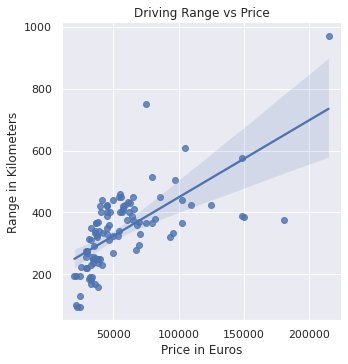

In [ ]:
# enter and test your code here
# make visualizations for Range vs price
sns.set(font_scale=1)
plt.figure(figsize=(20,10))
sns.lmplot(x = 'PriceEuro',
           y = 'Range_Km',
           data = df)

plt.title("Driving Range vs Price")
plt.xlabel("Price in Euros")
plt.ylabel("Range in Kilometers")
plt.show()

Range and Price show a strong positive correlation with a correlation co-efficient of 0.674. Not too surprising as more expensive cars should have better and larger batteries, better technology to increase efficiency, and overall better engineered to get the longest range.

<Figure size 1440x720 with 0 Axes>

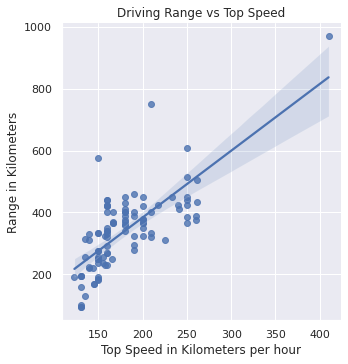

In [ ]:
# enter and test your code here
# make visualizations for Range vs top speed
sns.set(font_scale=1)
plt.figure(figsize=(20,10))
sns.lmplot(x = 'TopSpeed_KmH',
           y = 'Range_Km',
           data = df)

plt.title("Driving Range vs Top Speed")
plt.xlabel("Top Speed in Kilometers per hour")
plt.ylabel("Range in Kilometers")
plt.show()

Range and top speed shows the strongest positive correlation with a correlation co-efficient of 0.746. I can't quite specualte why this may be. If expected top speed to have a negative correlation as faster cars are usually the ones that are designed anf engineered for speed rather than range and efficiency.

<Figure size 1440x720 with 0 Axes>

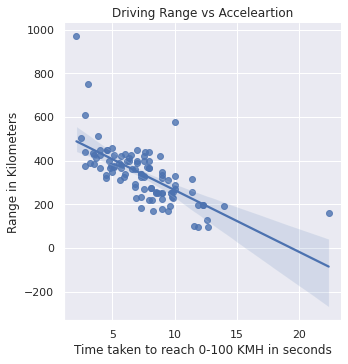

In [ ]:
# enter and test your code here
# make visualizations for Range vs acceleration
sns.set(font_scale=1)
plt.figure(figsize=(20,10))
sns.lmplot(x = 'AccelSec',
           y = 'Range_Km',
           data = df)

plt.title("Driving Range vs Acceleartion")
plt.xlabel("Time taken to reach 0-100 KMH in seconds")
plt.ylabel("Range in Kilometers")
plt.show()

Range and acceleration showed a strong negative correlation with a correlation co-efficient of -0.677. It is negative because the acceleration in the time in seconds for the car to reach 0-100 kmH, so if the acceleration was kilometers per second squared, the correlation would be positive. This again dosen't make too much sense to me a faster cars usually have worse efficiency and range, but this might be different for EV's.

<Figure size 1440x1440 with 0 Axes>

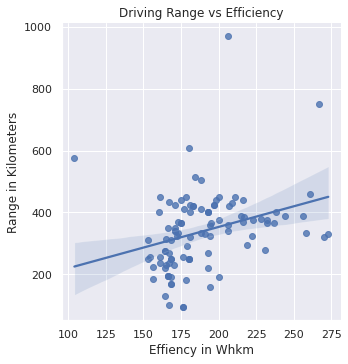

In [ ]:
# enter and test your code here
# make visualizations for Range vs acceleration
sns.set(font_scale=1)
plt.figure(figsize=(20,20))
sns.lmplot(x = 'Efficiency_WhKm',
           y = 'Range_Km',
           data = df)

plt.title("Driving Range vs Efficiency")
plt.xlabel("Effiency in Whkm")
plt.ylabel("Range in Kilometers")
plt.show()

This one surprised me the most. I expected efficiency to have the strongest positive correlation with range, but it ended up having the weakest one. To the best of my knowledge, efficiency is the main thing that should affect the range, but the dataset seems to say otherwise.

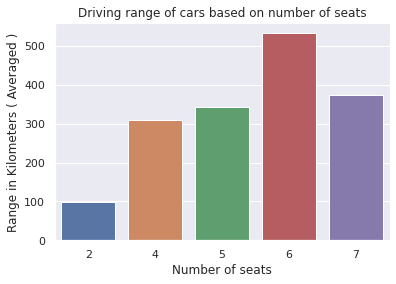

In [ ]:
# we can also check how the number of seats in a car affects the range. This is best shown with a bar plot
df_grouped_count =  df.groupby(by='Seats').mean()
df_grouped_count = df_grouped_count.reset_index()
sns.barplot(x = "Seats",
            y = "Range_Km",
            data = df_grouped_count)
plt.title("Driving range of cars based on number of seats")
plt.xlabel("Number of seats")
plt.ylabel("Range in Kilometers ( Averaged )")
plt.show()


THe bar chart shows that cars with 5 seats have the highest averaged range, this makes sense. This is because cars with 2 doors are usually sports cars that are designed with speed and power in mind rather than range and efficiency. 6 seaters are usually those cars which are desined for daily family use in which case, range and efficiency are big factors, so it makes sense that 6 seaters have the longest range.

---
---